In [45]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import statsmodels.api as sm

from datetime import datetime

df = pd.read_csv("data/southern_osc.zip",  index_col=['Date'], parse_dates=['Date'], dayfirst=False) # считываем датасет
df

,T_i
Date,
1951-01-01,1.5
1951-02-01,0.9
1951-03-01,-0.1
1951-04-01,-0.3
1951-05-01,-0.7
...,...
2019-02-01,-1.4
2019-03-01,-0.3
2019-04-01,0.1


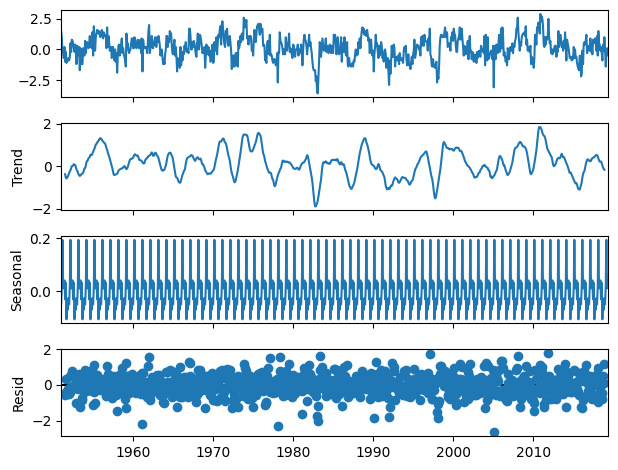

In [46]:
decomposition = seasonal_decompose(df, model='additive', period=12) 
decomposition.plot()
pyplot.show() # любуемся результатом

In [47]:
test_df = df.iloc[-1]
train_df = df.iloc[:-1]

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(train_df)
alpha = 0.7
model = ses.fit(smoothing_level = alpha, optimized = False)
exp_pred = model.forecast(1)
exp_pred

c:\Users\telis\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-06-01   -0.302693
Freq: MS, dtype: float64

In [49]:
def stat_test(df):
    test = sm.tsa.adfuller(df)
    print ('adf: ', test[0] )
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')

stat_test(train_df)

adf:  -7.790397600107432
p-value:  7.970501826428674e-12
Critical values:  {'1%': -3.438369485934381, '5%': -2.865079774912655, '10%': -2.5686548826226527}
единичных корней нет, ряд стационарен


In [50]:
#otg1diff = df.diff(periods=1).dropna()

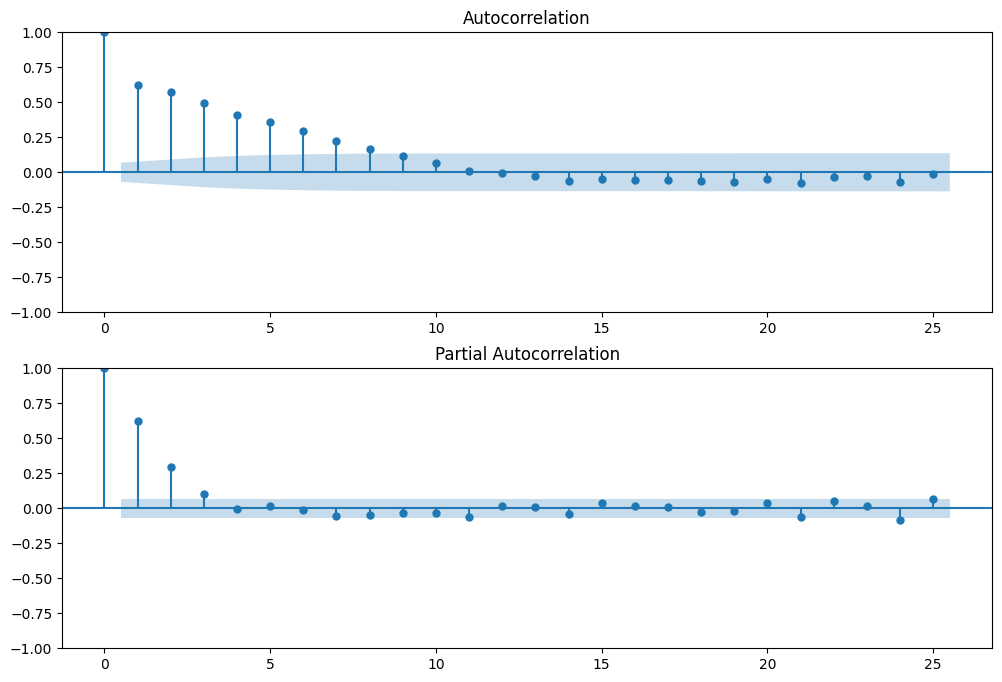

In [51]:
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df, lags=25, ax=ax2)

In [52]:
p = 2

In [53]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(train_df, lags=p).fit()
print(ar_model.summary())

ar_pred = ar_model.predict(start=len(train_df), end=(len(train_df)), dynamic=False)
ar_pred

                            AutoReg Model Results                             
Dep. Variable:                    T_i   No. Observations:                  821
Model:                     AutoReg(2)   Log Likelihood                -868.728
Method:               Conditional MLE   S.D. of innovations              0.699
Date:                Sun, 02 Nov 2025   AIC                           1745.455
Time:                        18:40:46   BIC                           1764.288
Sample:                    03-01-1951   HQIC                          1752.682
                         - 05-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0308      0.025      1.247      0.212      -0.018       0.079
T_i.L1         0.4405      0.033     13.194      0.000       0.375       0.506
T_i.L2         0.2961      0.033      8.881      0.0

c:\Users\telis\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\telis\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2019-06-01   -0.11579
Freq: MS, dtype: float64

In [54]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_df, ar_pred), mean_squared_error(test_df, exp_pred)

(0.1476173477399788, 0.03892993162281572)